{'whiskers': [<matplotlib.lines.Line2D at 0x7f7a65cabf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7a65cbd810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7a65cabb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7a65cc7110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7a65cc7550>],
 'means': []}

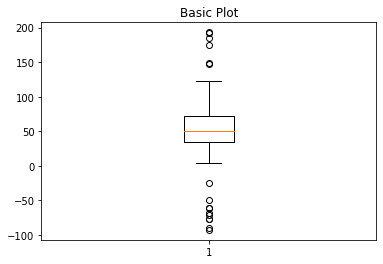

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))


fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)


Text(0, 0.5, 'Velocity matching metric')

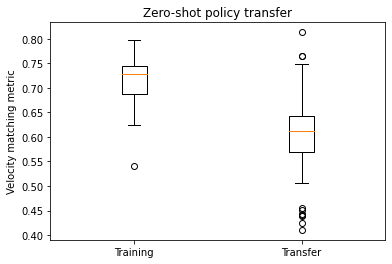

In [4]:

fname = '/home/cobracommander/modular_mbrl/mbrl_v8_test9NT2/test_data/transfer_results.ptx'
data = torch.load(fname)
vb = np.array(data['vel_baseline_list'])
v = np.array(data['vel_metric_list'])
              
metric_all = (vb-v)/vb
metric_seen = metric_all[data['seen_inds']]
metric_unseen = metric_all[data['unseen_inds']]


fig1, ax1 = plt.subplots()
ax1.set_title('Zero-shot policy transfer')
ax1.boxplot([metric_seen, metric_unseen],
           labels=['Training', 'Transfer'])
ax1.set_ylabel('Velocity matching metric')